In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!ls "/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary"

No  Yes


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
import random
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [32]:
dataset_path = "/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/"
class_names = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
class_names

['Yes', 'No']

In [34]:
path_no = dataset_path + 'No'
path_yes = dataset_path + 'Yes'

In [35]:
data_no = [os.path.join(path_no,x) for x in os.listdir(path_no)]
data_yes = [os.path.join(path_yes,x) for x in os.listdir(path_yes)]

In [36]:
images_no=[data_no[x] for x in range(len(data_no)) if data_no[x]]
images_yes=[data_yes[x] for x in range(len(data_yes)) if data_yes[x]]

#Create list of All Images
image_list = [images_no,images_yes]

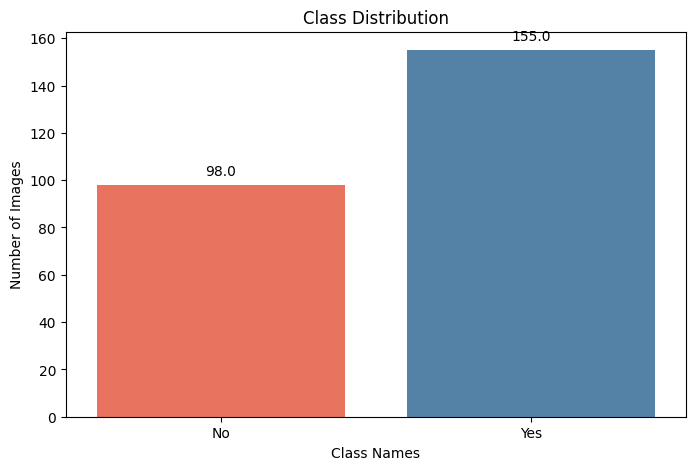

In [37]:
count_list = [len(images_no), len(images_yes)]
class_names = ['No', 'Yes']

# Define colors for each bar
colors = ['#FF6347', '#4682B4']  # Customize the colors as needed

plt.figure(figsize=(8, 5))

# Create the bar plot with specified colors
a = sns.barplot(x=class_names, y=count_list, palette=colors)

# Annotate each bar with its count
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.show()

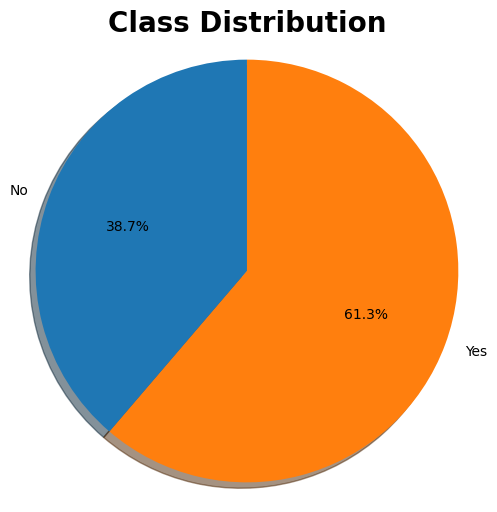

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

data = dict(zip(class_names,count_list))
category_counts = pd.Series(data)

plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Class Distribution', fontsize=20, fontweight='bold')
plt.axis('equal')

plt.show()

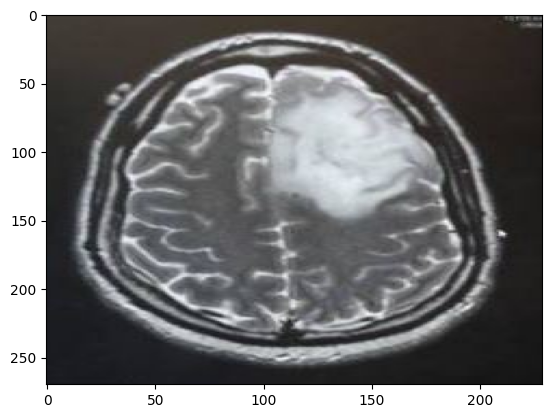

In [39]:
plt.imshow(cv2.cvtColor(cv2.imread(images_yes[0]),cv2.COLOR_BGR2RGB),aspect='auto')

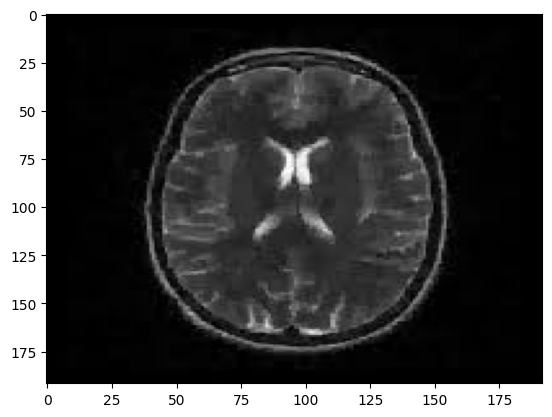

In [40]:
plt.imshow(cv2.cvtColor(cv2.imread(images_no[0]),cv2.COLOR_BGR2RGB),aspect='auto')

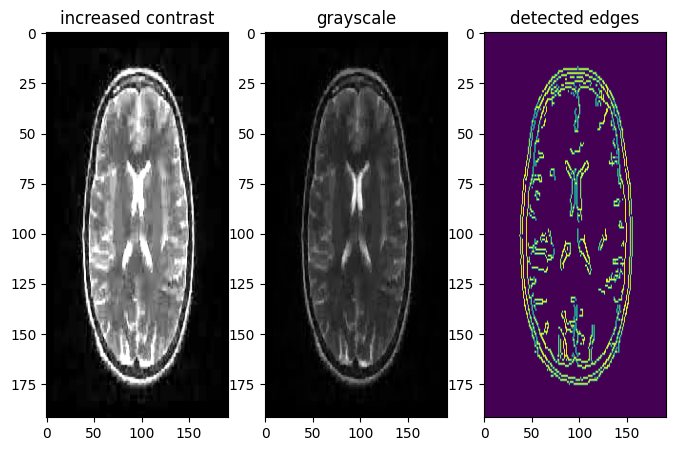

In [41]:
images_no_temp = cv2.imread(images_no[0])

contrast_img = cv2.addWeighted(images_no_temp, 2.5, np.zeros(images_no_temp.shape, images_no_temp.dtype), 0, 0)
img_gray = cv2.cvtColor(images_no_temp, cv2.COLOR_BGR2GRAY)

min_intensity_grad, max_intensity_grad = 100, 200
edge_img = cv2.Canny(images_no_temp, min_intensity_grad, max_intensity_grad)

fig, ax = plt.subplots(1,3, figsize=(8,5))
ax[0].imshow(contrast_img,aspect='auto'); ax[0].set_title('increased contrast')
ax[1].imshow(img_gray,aspect='auto', cmap='gray', vmin = 0, vmax = 255); ax[1].set_title('grayscale')
ax[2].imshow(edge_img,aspect='auto'); ax[2].set_title('detected edges')
plt.show()

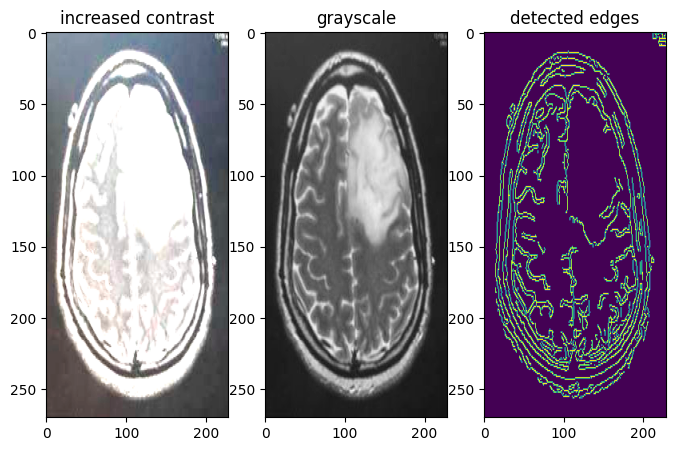

In [42]:
images_yes_temp = cv2.imread(images_yes[0])

contrast_img = cv2.addWeighted(images_yes_temp, 2.5, np.zeros(images_yes_temp.shape, images_yes_temp.dtype), 0, 0)
img_gray = cv2.cvtColor(images_yes_temp, cv2.COLOR_BGR2GRAY)

min_intensity_grad, max_intensity_grad = 100, 200
edge_img = cv2.Canny(images_yes_temp, min_intensity_grad, max_intensity_grad)

fig, ax = plt.subplots(1,3, figsize=(8,5))
ax[0].imshow(contrast_img,aspect='auto'); ax[0].set_title('increased contrast')
ax[1].imshow(img_gray,aspect='auto', cmap='gray', vmin = 0, vmax = 255); ax[1].set_title('grayscale')
ax[2].imshow(edge_img,aspect='auto'); ax[2].set_title('detected edges')
plt.show()

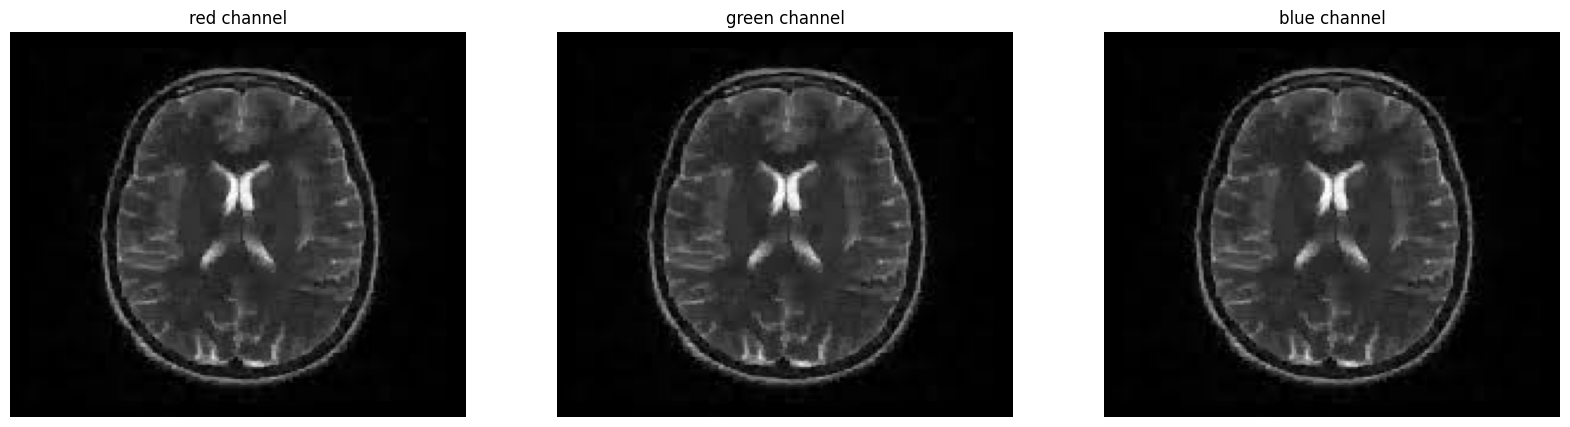

In [43]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
colors = ['red', 'green', 'blue']
for i, ax in enumerate(axes):
    ax.imshow(images_no_temp[:,:,i], cmap='gray',aspect='auto')
    ax.set_title(colors[i]+' channel'), ax.axis('off')
plt.show()

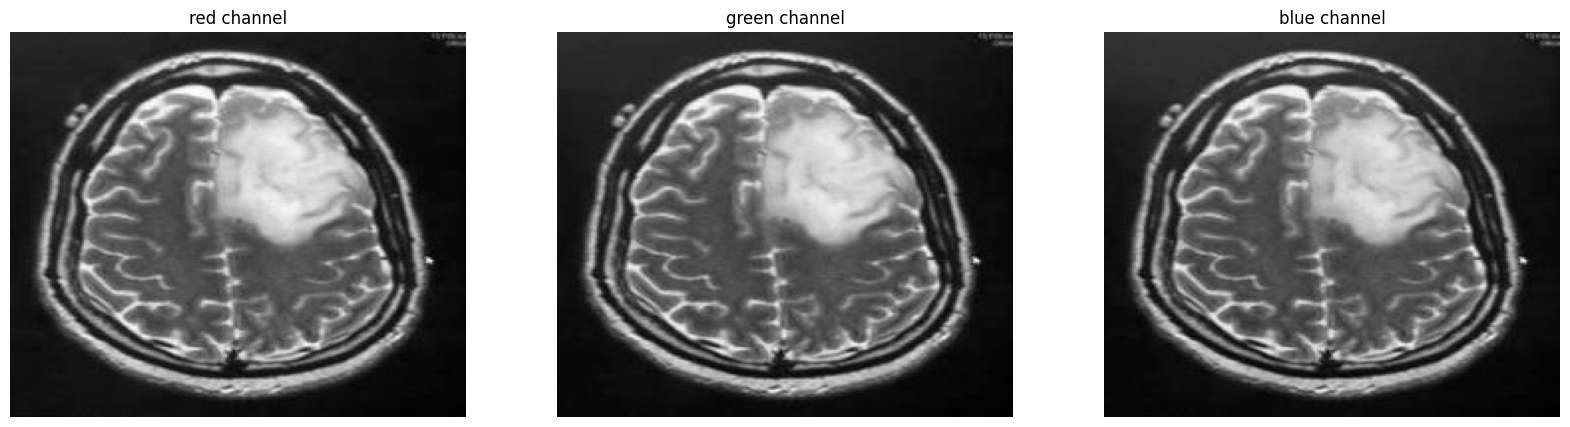

In [44]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
colors = ['red', 'green', 'blue']
for i, ax in enumerate(axes):
    ax.imshow(images_yes_temp[:,:,i], cmap='gray',aspect='auto')
    ax.set_title(colors[i]+' channel'), ax.axis('off')
plt.show()

In [45]:
!pip install Pillow

In [46]:
def show_random_smample(dataset_path, n_samples):
    classes = os.listdir(dataset_path)
    fig, ax = plt.subplots(1, n_samples, figsize=(5*n_samples, 6))
    fig.figure.figsize=(5*n_samples, 5)
    for i in range(n_samples):
        rand_class = classes[np.random.randint(0, len(classes), 1)[0]]
        rand_class_path = os.path.join(dataset_path, rand_class)
        samples = os.listdir(rand_class_path)
        rand_sample = np.random.randint(0, len(samples), 1)[0]
        img = cv2.imread(os.path.join(rand_class_path, samples[rand_sample]), cv2.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].set_title(f"{rand_class},\n {img.shape}")
    fig.tight_layout()
    fig.suptitle("Random samples")
    fig.show()

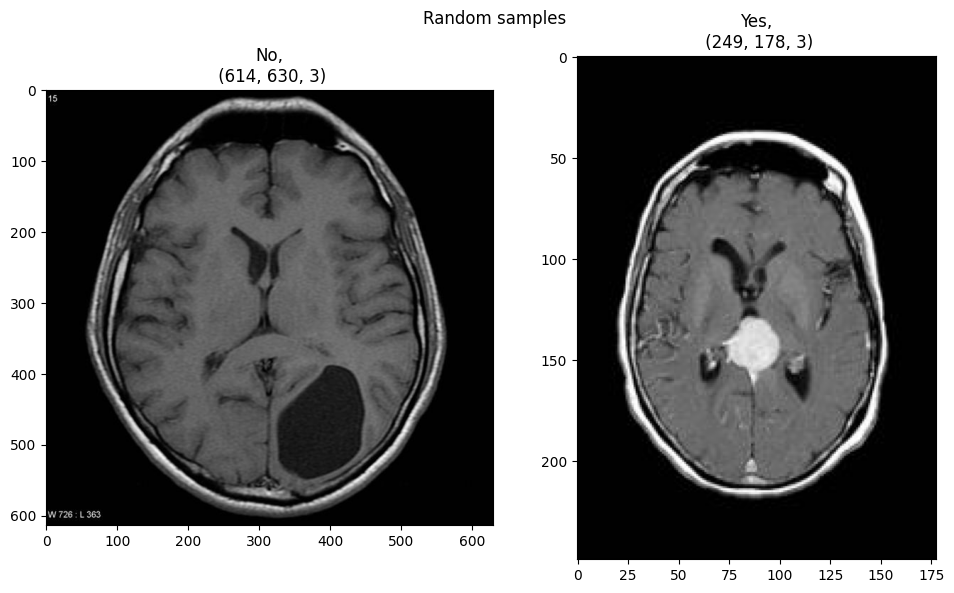

In [47]:
show_random_smample("/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/", 2)

In [48]:
!pip install basic-image-eda

In [50]:
from basic_image_eda import BasicImageEDA
def basic_image_eda(path):
    BasicImageEDA.explore(path)
    extensions = ['png', 'jpg', 'jpeg','JPG']
    threads = 0
    dimension_plot = True
    channel_hist = True
    nonzero = False
    hw_division_factor = 1.0
    BasicImageEDA.explore(path, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)


found 87 images.
Using 8 threads. (max:8)



100%|██████████| 87/87 [00:00<00:00, 309.50it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  87

dtype                                    |  uint8
channels                                 |  [1, 3]
extensions                               |  ['jpg', 'png']

min height                               |  210
max height                               |  1427
mean height                              |  484.1264367816092
median height                            |  380

min width                                |  180
max width                                |  1275
mean width                               |  431.55172413793105
median width                             |  310

mean height/width ratio                  |  1.121827140764416
median height/width ratio                |  1.2258064516129032
recommended input size(by mean)          |  [488 432] (h x w, multiples of 8)
recommended input size(by mean)          |  [480 432] (h x w, multiples of 16)
re

100%|██████████| 155/155 [00:00<00:00, 246.42it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  155

dtype                                    |  uint8
channels                                 |  [1, 3]
extensions                               |  ['JPG', 'jpg', 'png']

min height                               |  173
max height                               |  1427
mean height                              |  413.7032258064516
median height                            |  344

min width                                |  178
max width                                |  1275
mean width                               |  361.23870967741937
median width                             |  288

mean height/width ratio                  |  1.1452350335762251
median height/width ratio                |  1.1944444444444444
recommended input size(by mean)          |  [416 360] (h x w, multiples of 8)
recommended input size(by mean)          |  [416 368] (h x w, multiples 

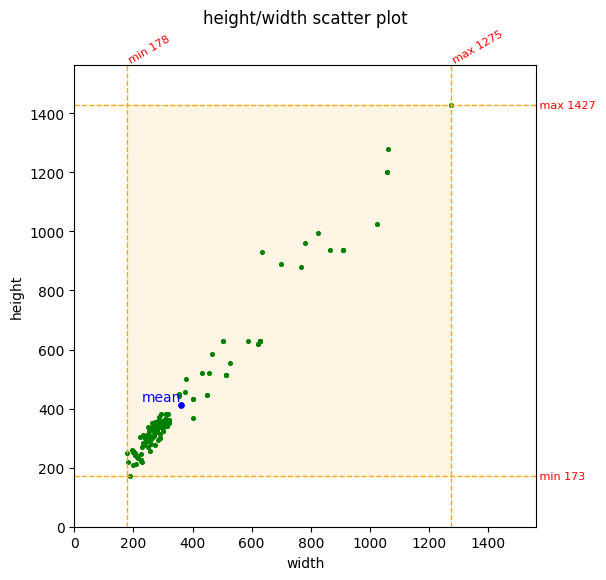

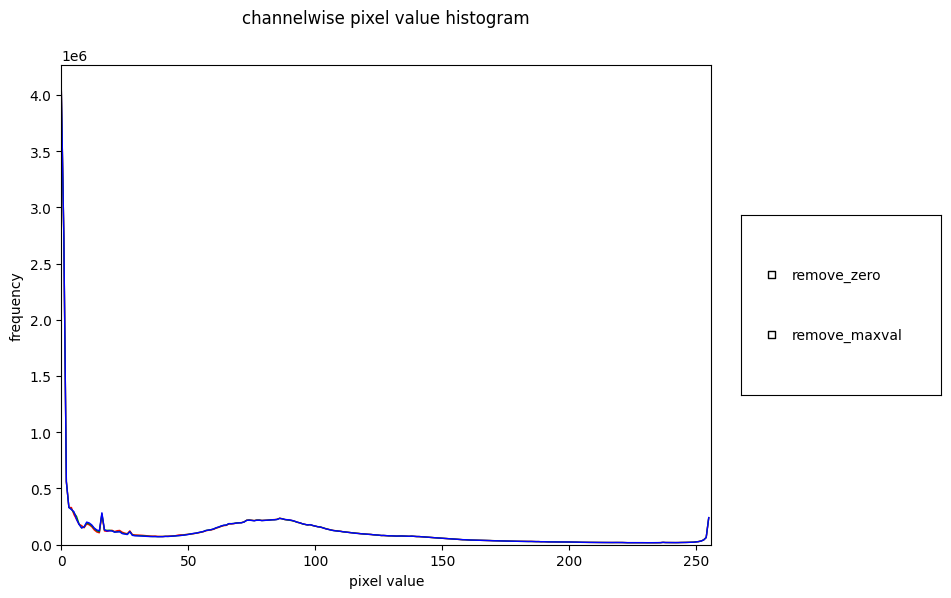

In [51]:
basic_image_eda("/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/Yes")


found 92 images.
Using 8 threads. (max:8)



100%|██████████| 92/92 [00:03<00:00, 27.35it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  92

dtype                                    |  uint8
channels                                 |  [1, 3, 4]
extensions                               |  ['jpeg', 'jpg', 'png']

min height                               |  168
max height                               |  1080
mean height                              |  345.85869565217394
median height                            |  250

min width                                |  150
max width                                |  1920
mean width                               |  350.0326086956522
median width                             |  232

mean height/width ratio                  |  0.9880756451262305
median height/width ratio                |  1.0775862068965518
recommended input size(by mean)          |  [344 352] (h x w, multiples of 8)
recommended input size(by mean)          |  [352 352] (h x w, multipl

Using 8 threads. (max:8)



100%|██████████| 98/98 [00:00<00:00, 143.67it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  98

dtype                                    |  uint8
channels                                 |  [1, 3, 4]
extensions                               |  ['jpeg', 'jpg', 'JPG', 'png']

min height                               |  168
max height                               |  1080
mean height                              |  342.234693877551
median height                            |  251

min width                                |  150
max width                                |  1920
mean width                               |  343.16326530612247
median width                             |  231

mean height/width ratio                  |  0.9972940826642878
median height/width ratio                |  1.0865800865800865
recommended input size(by mean)          |  [344 344] (h x w, multiples of 8)
recommended input size(by mean)          |  [336 336] (h x w, m

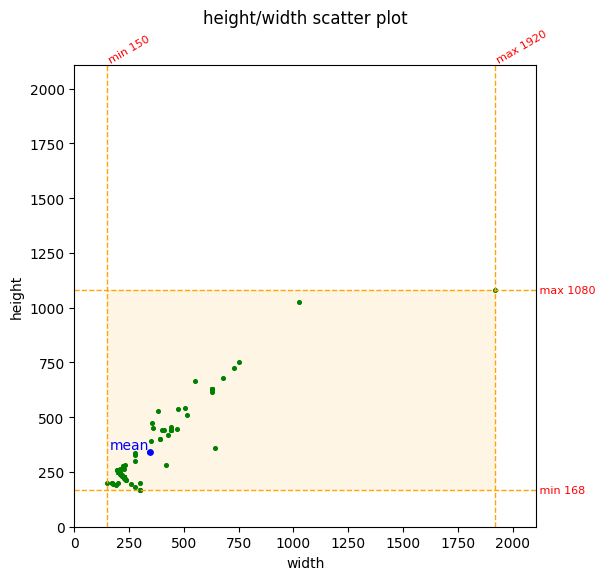

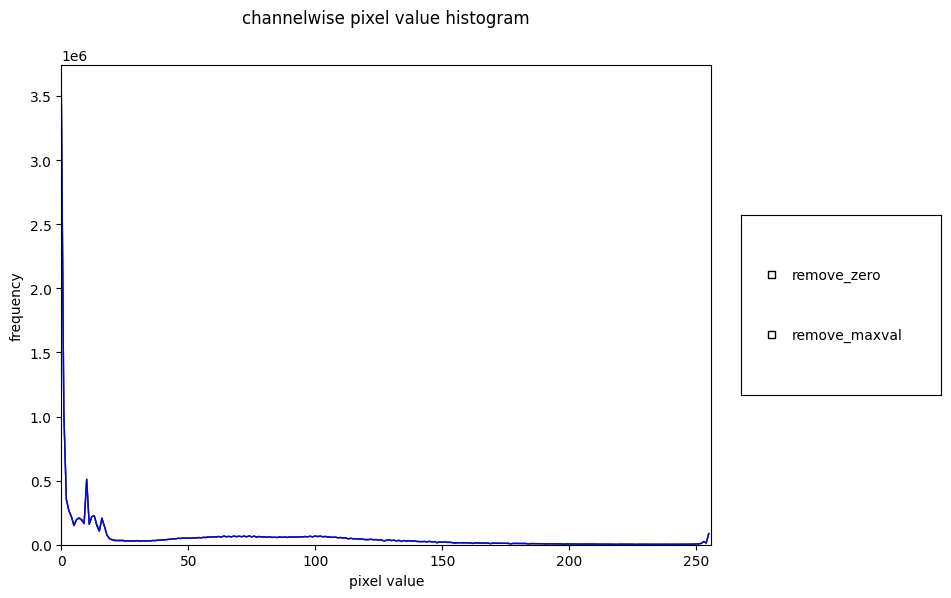

In [52]:
basic_image_eda("/content/drive/My Drive/Brain Tumour Detection/Dataset/Binary/No")